#                                         Detailed Analyses                                                            #


Following the exploratory analyses, from now ahead, detailed analyses will be performed in order to understand the problem with more granularity and also shedding light on the most important findings in the previous step.

## Environment setting

#### * Import the requested libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### * Load the file

In [3]:
arquivo = 'cyberattack_clean.csv'
dataset1 = pd.read_csv(arquivo, sep=',' ,header=0)

#### * Exploratory view

In [3]:
dataset1.head()

,id,affected_count,total_amount,naic_sector,naic_national_industry,sector,breach_date,cause
0,3,90,4473,56.0,561790.0,Administrative,15/11/2019,Other
1,6,1309,438795,54.0,541611.0,Professional,13/09/2019,Former Employee
2,7,3985,71743,56.0,561990.0,Administrative,03/05/2014,Former Consultant
3,10,62,25913,51.0,517919.0,Information,10/02/2017,Criminal Organization
4,14,2280,396347,23.0,237210.0,Construction,24/12/2012,Hacktivist


## Detailed Exploratory analyses

#### 1) What are the main causes that attack the sectors "Other" and Administrative? How much each group financially impact on each breach?
The sectors "Other" and Administrative were the ones that presented the highest financial losses due to cyberattacks. Knowing what was responsible for losses of this magnitude might help find vulnerabilities in the system  and prevent new attacks from certains groups. The objective here is to investigate what groups attack these sectors and also shed light on the financial losses caused by their attacks.

#### * Filter the dataset

In [4]:
dataset2 = dataset1.loc[(dataset1['sector'] == "Other") |
                         (dataset1['sector'] == "Administrative")]
dataset2.head()

,id,affected_count,total_amount,naic_sector,naic_national_industry,sector,breach_date,cause
0,3,90,4473,56.0,561790.0,Administrative,15/11/2019,Other
2,7,3985,71743,56.0,561990.0,Administrative,03/05/2014,Former Consultant
8,18,1369,535985,56.0,561510.0,Administrative,07/04/2014,Terrorist
11,24,160,835181,81.0,813410.0,Other,02/02/2015,Criminal Organization
13,26,2672,70593,81.0,813110.0,Other,24/10/2014,Nation State


In [5]:
dataset3 = dataset2[['sector','total_amount','cause']]
dataset3

,sector,total_amount,cause
0,Administrative,4473,Other
2,Administrative,71743,Former Consultant
8,Administrative,535985,Terrorist
11,Other,835181,Criminal Organization
13,Other,70593,Nation State
...,...,...,...
5579,Administrative,551,Terrorist
5582,Administrative,71537,Nation State
5583,Administrative,11859,Vendor
5586,Administrative,9163116,Former Employee


#### * Clean the dataset

In [6]:
dataset4 = dataset3.dropna(subset=['cause'], axis=0, how='any')
dataset4.isnull().sum()

sector          0
total_amount    0
cause           0
dtype: int64

#### * Set data to plot the graph
    * Create two grouped datasets (by sector and cause - summing losses and counting occurrences)
    * Adjust the columns
    * Create a column to express money amount in million dollars

In [8]:
group1 = dataset4.groupby(['sector','cause']).size()
dataset5 = group1.to_frame(name='breaches').reset_index()
dataset5

,sector,cause,breaches
0,Administrative,Criminal Organization,56
1,Administrative,Former Consultant,84
2,Administrative,Former Employee,70
3,Administrative,Hacktivist,60
4,Administrative,Nation State,56
5,Administrative,Other,78
6,Administrative,Terrorist,65
7,Administrative,Vendor,82
8,Other,Criminal Organization,29
9,Other,Former Consultant,21


In [9]:
group2 = dataset4.groupby(['sector','cause']).sum()
group2

total_amount
sector         cause                              
Administrative Criminal Organization    1143367621
               Former Consultant         975287406
               Former Employee           488438841
               Hacktivist               2300555480
               Nation State               50063855
               Other                     348723629
               Terrorist                 184556889
               Vendor                    120248819
Other          Criminal Organization      47863593
               Former Consultant          33299387
               Former Employee            15945120
               Hacktivist                 25498382
               Nation State              160273371
               Other                    8028510786
               Terrorist                 140789432
               Vendor                     21685411

In [10]:
group2.to_csv('totalcost_cause2.csv', index = True)
arquivo = 'totalcost_cause2.csv'
dataset6 = pd.read_csv(arquivo, sep=',' ,header=0)
dataset6

,sector,cause,total_amount
0,Administrative,Criminal Organization,1143367621
1,Administrative,Former Consultant,975287406
2,Administrative,Former Employee,488438841
3,Administrative,Hacktivist,2300555480
4,Administrative,Nation State,50063855
5,Administrative,Other,348723629
6,Administrative,Terrorist,184556889
7,Administrative,Vendor,120248819
8,Other,Criminal Organization,47863593
9,Other,Former Consultant,33299387


In [11]:
dataset6['breaches'] = dataset5['breaches']
dataset6

,sector,cause,total_amount,breaches
0,Administrative,Criminal Organization,1143367621,56
1,Administrative,Former Consultant,975287406,84
2,Administrative,Former Employee,488438841,70
3,Administrative,Hacktivist,2300555480,60
4,Administrative,Nation State,50063855,56
5,Administrative,Other,348723629,78
6,Administrative,Terrorist,184556889,65
7,Administrative,Vendor,120248819,82
8,Other,Criminal Organization,47863593,29
9,Other,Former Consultant,33299387,21


In [12]:
dataset6['total_amount_million'] = dataset6['total_amount']/1000000
dataset6

,sector,cause,total_amount,breaches,total_amount_million
0,Administrative,Criminal Organization,1143367621,56,1143.367621
1,Administrative,Former Consultant,975287406,84,975.287406
2,Administrative,Former Employee,488438841,70,488.438841
3,Administrative,Hacktivist,2300555480,60,2300.555480
4,Administrative,Nation State,50063855,56,50.063855
5,Administrative,Other,348723629,78,348.723629
6,Administrative,Terrorist,184556889,65,184.556889
7,Administrative,Vendor,120248819,82,120.248819
8,Other,Criminal Organization,47863593,29,47.863593
9,Other,Former Consultant,33299387,21,33.299387


#### * Barplots showing the effect of each group on the number of occurrences and the money lost on the sector "Other".

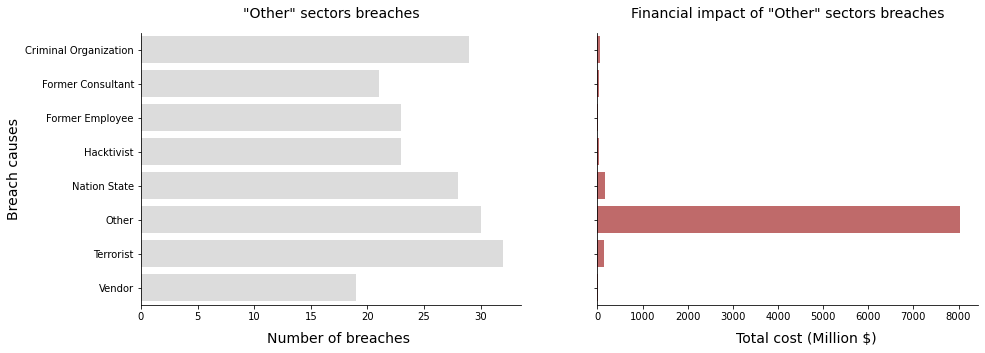

In [17]:
fig, ax = plt.subplots(1,2,
                       sharey = True,
                       figsize=(15,5))

sns.barplot(data=dataset6.loc[(dataset6['sector'] == "Other")],
            x = "breaches",
            y = "cause",
            ci = None,
            color = 'gainsboro',
            ax=ax[0])

ax[0].set_title('"Other" sectors breaches',
                fontsize=14,
                pad = 15)

ax[0].set_xlabel('Number of breaches',
                 fontsize=14)

ax[0].set_ylabel('Breach causes',
                 fontsize=14)

ax[0].xaxis.set_label_coords(0.52, -0.10)

sns.despine()

sns.barplot(data=dataset6.loc[(dataset6['sector'] == "Other")],
            x = "total_amount_million",
            y = 'cause',
            ci = None,
            color = 'indianred',
            ax=ax[1])

ax[1].set_title('Financial impact of "Other" sectors breaches',
                fontsize=14,
                pad = 15)

ax[1].set_xlabel('Total cost (Million $)',
                 fontsize=14)

ax[1].xaxis.set_label_coords(0.55, -0.10)

ax[1].set_ylabel('')


sns.despine()

plt.savefig("othersectors_by_cause.jpg", format="jpg", bbox_inches="tight", pad_inches=0.5)

plt.show()

*Result 1A* --> Criminal Organizations, Nations States, Terrorists and "Other" groups are the main responsibles for the attacks made in "Other" sectors, although their numbers are not so far from the ones found for the remaining groups. However, one result stands out: "Other" groups caused losses bigger than 8 billion dollars, which is a way more than the losses caused by of all the remaining groups together. One more reason to set an investigation to discover who are these "Other" groups.  

#### * Barplots showing the effect of each group on the number of occurrences and the money lost on the sector Administrative.

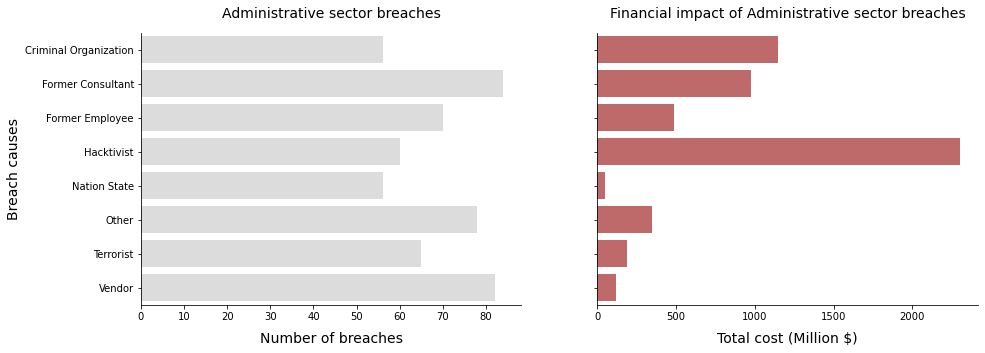

In [16]:
fig, ax = plt.subplots(1,2,
                       sharey = True,
                       figsize=(15,5))

sns.barplot(data=dataset6.loc[(dataset6['sector'] == "Administrative")],
            x = "breaches",
            y = "cause",
            ci = None,
            color = 'gainsboro',
            ax=ax[0])

ax[0].set_title('Administrative sector breaches',
                fontsize=14,
                pad = 15)

ax[0].set_xlabel('Number of breaches',
                 fontsize=14)

ax[0].set_ylabel('Breach causes',
                 fontsize=14)

ax[0].xaxis.set_label_coords(0.50, -0.10)

sns.despine()

sns.barplot(data=dataset6.loc[(dataset6['sector'] == "Administrative")],
            x = "total_amount_million",
            y = 'cause',
            ci = None,
            color = 'indianred',
            ax=ax[1])

ax[1].set_title('Financial impact of Administrative sector breaches',
                fontsize=14,
                pad = 15)

ax[1].set_xlabel('Total cost (Million $)',
                 fontsize=14)

ax[1].xaxis.set_label_coords(0.5, -0.10)

ax[1].set_ylabel('')


sns.despine()

plt.savefig("admsector_by_cause.jpg", format="jpg", bbox_inches="tight", pad_inches=0.5)

plt.show()

*Result 1B* --> Former Consultants, Vendors and "Other" groups are the main responsibles for the attacks made against the Administrative sector, although their numbers are not so far from the remaining groups. Concerning finacial issues, the situation is different. Hacktivists caused more than 2 billion dollars of losses because of its breaches on this sector. So, it is the group that needs to get attention from the authorities due to their effectiveness. Criminal Organizations and Former Consultants are groups that deserve attention to. Their breaches have already caused nearly 1 billion dollars of losses.

#### 2) What is the impact of the attacks made by the group "Other" through years?
Previous analyses have shown that "Other" groups caused huge losses to the government coffers. But what is their pattern of attack? How did this amount of money was reached without any previous interference from the government? The following analyses seek to answer how the attacks made by "Other" groups were performed through the studied period.

#### * Filter the dataset

In [18]:
dataset7 = dataset1.loc[(dataset1['cause'] == "Other")]
dataset7

,id,affected_count,total_amount,naic_sector,naic_national_industry,sector,breach_date,cause
0,3,90,4473,56.0,561790.0,Administrative,15/11/2019,Other
6,16,2,488,51.0,518210.0,Information,29/12/2018,Other
12,25,2769,2177244,61.0,611110.0,Education,13/07/2018,Other
30,55,722,232155,23.0,238210.0,Construction,09/04/2014,Other
37,70,7353,101312,32.0,325212.0,Manufacturing,18/05/2016,Other
...,...,...,...,...,...,...,...,...
5560,9946,1,3621,62.0,621420.0,Healthcare,27/06/2020,Other
5562,9949,65,110471,52.0,525120.0,Financial,11/10/2017,Other
5564,9954,5372,1158085,71.0,712130.0,Entertainment,01/04/2015,Other
5574,9973,11,73178,54.0,541511.0,Professional,07/02/2019,Other


#### * Clean the dataset

In [19]:
dataset8 = dataset7.dropna(subset=['cause'], axis=0, how='any')
dataset8.isnull().sum()

id                        0
affected_count            0
total_amount              0
naic_sector               7
naic_national_industry    7
sector                    7
breach_date               0
cause                     0
dtype: int64

#### * Create a new column for years

In [20]:
dataset8['year'] = pd.DatetimeIndex(dataset8['breach_date']).year
dataset8

,id,affected_count,total_amount,naic_sector,naic_national_industry,sector,breach_date,cause,year
0,3,90,4473,56.0,561790.0,Administrative,15/11/2019,Other,2019
6,16,2,488,51.0,518210.0,Information,29/12/2018,Other,2018
12,25,2769,2177244,61.0,611110.0,Education,13/07/2018,Other,2018
30,55,722,232155,23.0,238210.0,Construction,09/04/2014,Other,2014
37,70,7353,101312,32.0,325212.0,Manufacturing,18/05/2016,Other,2016
...,...,...,...,...,...,...,...,...,...
5560,9946,1,3621,62.0,621420.0,Healthcare,27/06/2020,Other,2020
5562,9949,65,110471,52.0,525120.0,Financial,11/10/2017,Other,2017
5564,9954,5372,1158085,71.0,712130.0,Entertainment,01/04/2015,Other,2015
5574,9973,11,73178,54.0,541511.0,Professional,07/02/2019,Other,2019


#### * Set data to plot the graph
    * Create a grouped dataset (by year)
    * Adjust the columns
    * Create a column to express money amount in million dollars

In [22]:
group1 = dataset8.groupby(['year']).sum()
group1

,id,affected_count,total_amount,naic_sector,naic_national_industry
year,,,,,
2011,362805,1194075,554060650,4072.0,40890942.0
2012,295571,140418,20489224,2997.0,30121525.0
2013,354125,269439,224615779,3932.0,39536557.0
2014,304005,123104,148210100,3101.0,31160056.0
2015,360981,4197205,97169627,4390.0,44110797.0
2016,295991,541522,108530851,3523.0,35399527.0
2017,404993,710191,140942221,4157.0,41786263.0
2018,397355,554956,285408938,4409.0,44282762.0
2019,361211,94121,542919030,3728.0,37433598.0


In [23]:
group1.to_csv('totalcost_other.csv', index = True)
arquivo = 'totalcost_other.csv'
dataset8 = pd.read_csv(arquivo, sep=',' ,header=0)
dataset8

,year,id,affected_count,total_amount,naic_sector,naic_national_industry
0,2011,362805,1194075,554060650,4072.0,40890942.0
1,2012,295571,140418,20489224,2997.0,30121525.0
2,2013,354125,269439,224615779,3932.0,39536557.0
3,2014,304005,123104,148210100,3101.0,31160056.0
4,2015,360981,4197205,97169627,4390.0,44110797.0
5,2016,295991,541522,108530851,3523.0,35399527.0
6,2017,404993,710191,140942221,4157.0,41786263.0
7,2018,397355,554956,285408938,4409.0,44282762.0
8,2019,361211,94121,542919030,3728.0,37433598.0
9,2020,288675,831721,8101091825,3493.0,35089645.0


In [24]:
dataset8['total_amount_million'] = dataset8['total_amount']/1000000
dataset8

,year,id,affected_count,total_amount,naic_sector,naic_national_industry,total_amount_million
0,2011,362805,1194075,554060650,4072.0,40890942.0,554.060650
1,2012,295571,140418,20489224,2997.0,30121525.0,20.489224
2,2013,354125,269439,224615779,3932.0,39536557.0,224.615779
3,2014,304005,123104,148210100,3101.0,31160056.0,148.210100
4,2015,360981,4197205,97169627,4390.0,44110797.0,97.169627
5,2016,295991,541522,108530851,3523.0,35399527.0,108.530851
6,2017,404993,710191,140942221,4157.0,41786263.0,140.942221
7,2018,397355,554956,285408938,4409.0,44282762.0,285.408938
8,2019,361211,94121,542919030,3728.0,37433598.0,542.919030
9,2020,288675,831721,8101091825,3493.0,35089645.0,8101.091825


#### * Barplot showing the amount of money lost by year because of the attacks made by the "Other" group

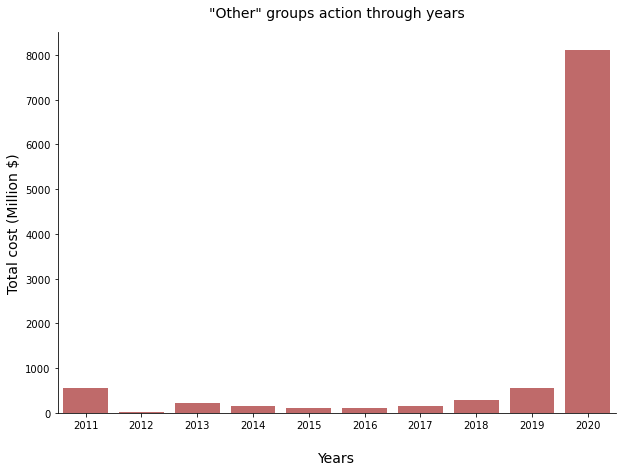

In [25]:
fig, ax = plt.subplots(figsize=(10,7))

sns.barplot(data=dataset8,
            x = "year",
            y = "total_amount_million",
            ci = None,
            color = 'indianred')

ax.set_title('"Other" groups action through years',
                fontsize=14,
                pad = 15)
ax.set_xlabel('Years',
                 fontsize=14)

ax.set_ylabel('Total cost (Million $)',
                 fontsize=14)

ax.xaxis.set_label_coords(0.5, -0.10)

sns.despine()

plt.savefig("totalcost_by_other.jpg", format="jpg", bbox_inches="tight", pad_inches=0.5)

plt.show()

*Result 2* --> The high amount of money loss due to "Other" groups breaches does not come from different periods. In fact, it comes basically from 2020. Further investigation shows that this huge amount come from one only breach, that caused more than 7 billion dollars of losses. It dates from 10 April 2020. Knowing how and where this attack occurred, as so as who performed it, might prevent further attacks with such financial dimension.  

#### 3) What are the sectors that suffer more losses from attacks made by Hacktivist and Former Consultants?
Hacktivists and Former Consultants were the main responsibles for the financial losses during the studied period (Exp. Analyses - Result 6). Thus, it is important to know what sectors are prefferred by them as targets. The objective here is to cundut an investigation to find out what are the main targets of Hacktivists and Former Consultants regarding financial losses. 

#### * Filter the dataset

In [4]:
dataset9 = dataset1.loc[(dataset1['cause'] == "Former Consultant") |
                        (dataset1['cause'] == "Hacktivist")]
dataset9

,id,affected_count,total_amount,naic_sector,naic_national_industry,sector,breach_date,cause
2,7,3985,71743,56.0,561990.0,Administrative,03/05/2014,Former Consultant
4,14,2280,396347,23.0,237210.0,Construction,24/12/2012,Hacktivist
20,40,45,8359,52.0,524126.0,Financial,26/07/2018,Hacktivist
28,53,431,247189,54.0,541611.0,Professional,08/07/2019,Former Consultant
31,58,16149,224260,32.0,321211.0,Manufacturing,16/11/2014,Former Consultant
...,...,...,...,...,...,...,...,...
5559,9945,6,549072,56.0,561990.0,Administrative,10/02/2011,Former Consultant
5561,9947,1,120317,62.0,622110.0,Healthcare,01/04/2012,Former Consultant
5568,9961,1,4252,56.0,561990.0,Administrative,31/01/2012,Former Consultant
5569,9965,1,200381,61.0,611110.0,Education,19/11/2013,Former Consultant


In [5]:
dataset10 = dataset9[['sector','total_amount','cause']]
dataset10

,sector,total_amount,cause
2,Administrative,71743,Former Consultant
4,Construction,396347,Hacktivist
20,Financial,8359,Hacktivist
28,Professional,247189,Former Consultant
31,Manufacturing,224260,Former Consultant
...,...,...,...
5559,Administrative,549072,Former Consultant
5561,Healthcare,120317,Former Consultant
5568,Administrative,4252,Former Consultant
5569,Education,200381,Former Consultant


#### * Clean the dataset

In [9]:
dataset11 = dataset10.dropna(subset=['cause'], axis=0, how='any')
dataset12 = dataset11.dropna(subset=['sector'], axis=0, how='any')
dataset12.isnull().sum()

sector          0
total_amount    0
cause           0
dtype: int64

#### * Set data to plot the graph
    * Create two grouped datasets (by sector - summing losses and counting occurrences)
    * Adjust the columns
    * Create a column to express money amount in million dollars

In [10]:
group1 = dataset12.groupby(['cause','sector']).sum()
group1

total_amount
cause             sector                      
Former Consultant Administrative     975287406
                  Agriculture           210950
                  Construction         3236120
                  Education         2377834061
                  Entertainment       28398922
                  Financial           74108563
                  Healthcare         198067278
                  Hospitality          3896847
                  Information         27811048
                  Management           2540204
                  Manufacturing       39035854
                  Mining                353003
                  Other               33299387
                  Professional       104975662
                  Public             197723335
                  Real Estate         52435699
                  Retail              77193872
                  Trade                3925904
                  Transportation         57168
                  Utilities              16887
Hacktivist        Administrative    2300555480
                  Agriculture           861526
                  Construction          712816
                  Education          226934129
                  Entertainment       13964975
                  Financial          242741254
                  Healthcare         479215329
                  Hospitality         27173557
                  Information        137283344
                  Management          98508476
                  Manufacturing       95765423
                  Mining                359278
                  Other               25498382
                  Professional      1090599375
                  Public              42700383
                  Real Estate          4684378
                  Retail              30824799
                  Trade               47467338
                  Transportation      28785605
                  Utilities             390409

In [11]:
group1.to_csv('totalcost_cause_sector.csv', index = True)
arquivo = 'totalcost_cause_sector.csv'
dataset12 = pd.read_csv(arquivo, sep=',' ,header=0)
dataset12

,cause,sector,total_amount
0,Former Consultant,Administrative,975287406
1,Former Consultant,Agriculture,210950
2,Former Consultant,Construction,3236120
3,Former Consultant,Education,2377834061
4,Former Consultant,Entertainment,28398922
5,Former Consultant,Financial,74108563
6,Former Consultant,Healthcare,198067278
7,Former Consultant,Hospitality,3896847
8,Former Consultant,Information,27811048
9,Former Consultant,Management,2540204


In [14]:
dataset12['total_amount_million'] = dataset12['total_amount']/1000000
dataset12

,cause,sector,total_amount,total_amount_million
0,Former Consultant,Administrative,975287406,975.287406
1,Former Consultant,Agriculture,210950,0.210950
2,Former Consultant,Construction,3236120,3.236120
3,Former Consultant,Education,2377834061,2377.834061
4,Former Consultant,Entertainment,28398922,28.398922
5,Former Consultant,Financial,74108563,74.108563
6,Former Consultant,Healthcare,198067278,198.067278
7,Former Consultant,Hospitality,3896847,3.896847
8,Former Consultant,Information,27811048,27.811048
9,Former Consultant,Management,2540204,2.540204


#### * Barplot showing the Hacktivists impact on each sector

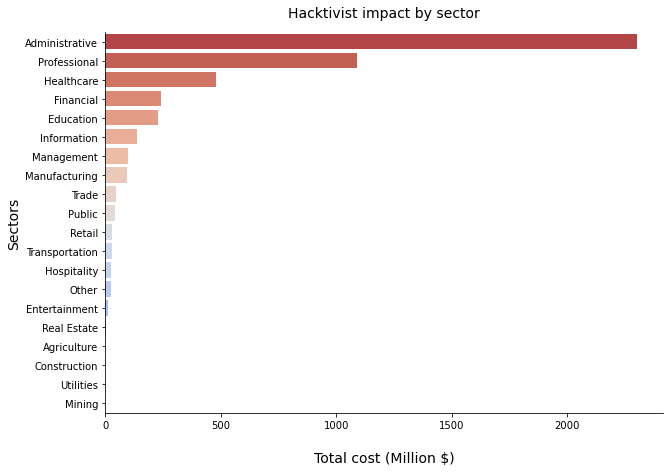

In [16]:
fig, ax = plt.subplots(figsize=(10,7))

ax = sns.barplot(data=dataset12.loc[(dataset12['cause'] == "Hacktivist")],
                 x = "total_amount_million",
                 y = "sector",
                 ci = None,
                 palette = 'coolwarm_r',
                 order=dataset12.loc[(dataset12['cause'] == "Hacktivist")].sort_values('total_amount_million',
                                                                                       ascending=False).sector)

ax.set_title('Hacktivist impact by sector',
             fontsize=14,
             pad = 15)

ax.set_xlabel('Total cost (Million $)',
              fontsize=14)

ax.set_ylabel('Sectors',
              fontsize=14)

ax.xaxis.set_label_coords(0.50, -0.10)

sns.despine()

#### * Create a new dataset just with the relevant groups

In [19]:
dataset12B = dataset12.loc[(dataset12['sector'] == "Financial") |
                           (dataset12['sector'] == "Administrative") |
                           (dataset12['sector'] == "Professional") |
                           (dataset12['sector'] == "Healthcare") |
                           (dataset12['sector'] == "Education")]
                        
dataset12B

,cause,sector,total_amount,total_amount_million
0,Former Consultant,Administrative,975287406,975.287406
3,Former Consultant,Education,2377834061,2377.834061
5,Former Consultant,Financial,74108563,74.108563
6,Former Consultant,Healthcare,198067278,198.067278
13,Former Consultant,Professional,104975662,104.975662
20,Hacktivist,Administrative,2300555480,2300.555480
23,Hacktivist,Education,226934129,226.934129
25,Hacktivist,Financial,242741254,242.741254
26,Hacktivist,Healthcare,479215329,479.215329
33,Hacktivist,Professional,1090599375,1090.599375


#### * Barplot showing the Hacktivists impact on each sector (sliced)

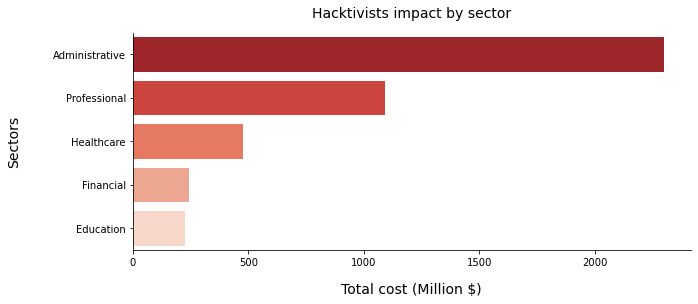

In [26]:
fig, ax = plt.subplots(figsize=(10,4))

ax = sns.barplot(data=dataset12B.loc[(dataset12B['cause'] == "Hacktivist")],
                 x = "total_amount_million",
                 y = "sector",
                 ci = None,
                 palette = 'Reds_r',
                 order=dataset12B.loc[(dataset12B['cause'] == "Hacktivist")].sort_values('total_amount_million',
                                                                                         ascending=False).sector)

ax.set_title('Hacktivists impact by sector',
             fontsize=14,
             pad = 15)

ax.set_xlabel('Total cost (Million $)',
              fontsize=14)

ax.set_ylabel('Sectors',
              fontsize=14)

ax.xaxis.set_label_coords(0.50, -0.15)
ax.yaxis.set_label_coords(-0.2, 0.5)

sns.despine()

plt.savefig("hack_cost.jpg", format="jpg", bbox_inches="tight", pad_inches=0.5)

plt.show()

*Result 3A* --> The sector in which the Hacktivists attacks are more efficient concerning costs is the Administrative. The cost reaches more than 2 billion dollars. Following it, it is the Professional sector with a little more then 1 billion dollars. The remaining sectors do not reach more than 500 million dollars, however they are worthy of investigation. Just the sectors that present the highest level of losses are represented here.   

#### * Barplot showing the Former Consultants impact on each sector

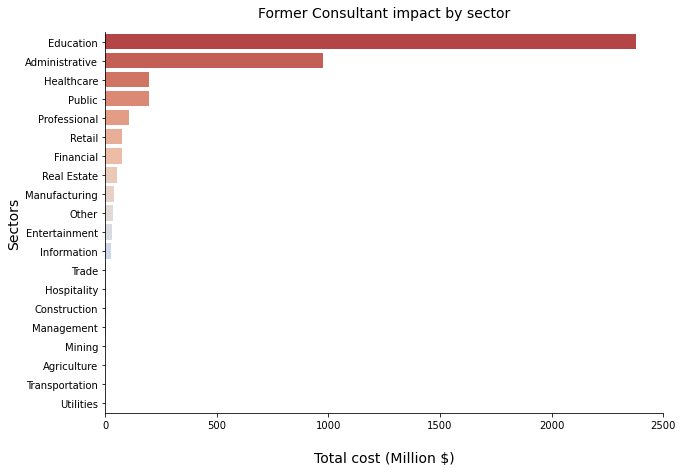

In [22]:
fig, ax = plt.subplots(figsize=(10,7))

ax = sns.barplot(data=dataset12.loc[(dataset12['cause'] == "Former Consultant")],
                 x = "total_amount_million",
                 y = "sector",
                 ci = None,
                 palette = 'coolwarm_r',
                 order=dataset12.loc[(dataset12['cause'] == "Former Consultant")].sort_values('total_amount_million',
                                                                                              ascending=False).sector)

ax.set_title('Former Consultant impact by sector',
             fontsize=14,
             pad = 15)

ax.set_xlabel('Total cost (Million $)',
              fontsize=14)

ax.set_ylabel('Sectors',
              fontsize=14)

ax.xaxis.set_label_coords(0.50, -0.10)
ax.set_xlim([0.0, 2500])

sns.despine()

#### * Create a new dataset just with the relevant groups

In [24]:
dataset12C = dataset12.loc[(dataset12['sector'] == "Public") |
                           (dataset12['sector'] == "Administrative") |
                           (dataset12['sector'] == "Professional") |
                           (dataset12['sector'] == "Healthcare") |
                           (dataset12['sector'] == "Education")]
                    
dataset12C

,cause,sector,total_amount,total_amount_million
0,Former Consultant,Administrative,975287406,975.287406
3,Former Consultant,Education,2377834061,2377.834061
6,Former Consultant,Healthcare,198067278,198.067278
13,Former Consultant,Professional,104975662,104.975662
14,Former Consultant,Public,197723335,197.723335
20,Hacktivist,Administrative,2300555480,2300.555480
23,Hacktivist,Education,226934129,226.934129
26,Hacktivist,Healthcare,479215329,479.215329
33,Hacktivist,Professional,1090599375,1090.599375
34,Hacktivist,Public,42700383,42.700383


#### * Barplot showing the Former Consultants impact on each sector (sliced)

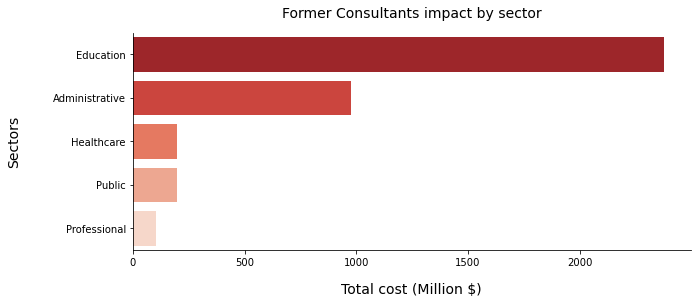

In [25]:
fig, ax = plt.subplots(figsize=(10,4))

ax = sns.barplot(data=dataset12C.loc[(dataset12C['cause'] == "Former Consultant")],
                 x = "total_amount_million",
                 y = "sector",
                 ci = None,
                 palette = 'Reds_r',
                 order=dataset12C.loc[(dataset12C['cause'] == "Former Consultant")].sort_values('total_amount_million',
                                                                                                ascending=False).sector)

ax.set_title('Former Consultants impact by sector',
             fontsize=14,
             pad = 15)

ax.set_xlabel('Total cost (Million $)',
              fontsize=14)

ax.set_ylabel('Sectors',
              fontsize=14)

ax.xaxis.set_label_coords(0.50, -0.15)
ax.yaxis.set_label_coords(-0.2, 0.5)

sns.despine()

plt.savefig("formerc_cost.jpg", format="jpg", bbox_inches="tight", pad_inches=0.5)

plt.show()

*Result 3B* --> The sector that suffered more losses due to Former Consultants attacks is the Education. Former COnsultant attacks on this sector costed more than 2 billion dollars. Following it, it is the Administrative sector with almost 1 billion dollars if losses. The remaining sector do not reach 200 million dollars, however they are worthy of investigation. Just the sectors that present the highest level of losses are represented here. 

#### 4) How were the sectors that present the higher losses by breach attack through the studied period?
The sectors which presented the highest losses by breach were the Utilities, Administrative and Education sectors (Exp. Analyses - Result 7). Knowing how these attacks are being performed through time might bring important information about how these sectors are attacked and prevent further losses. The objective here is to investigate how the sectors Utilities, Administrative and Education are attacked though time.

In [27]:
dataset13 = dataset1.loc[(dataset1['sector'] == "Utilities") |
                         (dataset1['sector'] == "Administrative") |
                         (dataset1['sector'] == "Education")]
dataset13

,id,affected_count,total_amount,naic_sector,naic_national_industry,sector,breach_date,cause
0,3,90,4473,56.0,561790.0,Administrative,15/11/2019,Other
2,7,3985,71743,56.0,561990.0,Administrative,03/05/2014,Former Consultant
8,18,1369,535985,56.0,561510.0,Administrative,07/04/2014,Terrorist
12,25,2769,2177244,61.0,611110.0,Education,13/07/2018,Other
14,28,1,312,61.0,611310.0,Education,30/07/2019,Vendor
...,...,...,...,...,...,...,...,...
5580,9982,78708,101865,61.0,611110.0,Education,22/02/2020,Other
5582,9986,12,71537,56.0,561990.0,Administrative,25/11/2018,Nation State
5583,9987,15,11859,56.0,561520.0,Administrative,02/10/2019,Vendor
5586,9991,30865,9163116,56.0,561492.0,Administrative,03/11/2013,Former Employee


In [28]:
dataset14 = dataset13.dropna(subset=['breach_date'], axis=0, how='any')
dataset14.isnull().sum()

id                         0
affected_count             0
total_amount               0
naic_sector                0
naic_national_industry     0
sector                     0
breach_date                0
cause                     95
dtype: int64

In [29]:
dataset14['year'] = pd.DatetimeIndex(dataset14['breach_date']).year
dataset14

,id,affected_count,total_amount,naic_sector,naic_national_industry,sector,breach_date,cause,year
0,3,90,4473,56.0,561790.0,Administrative,15/11/2019,Other,2019
2,7,3985,71743,56.0,561990.0,Administrative,03/05/2014,Former Consultant,2014
8,18,1369,535985,56.0,561510.0,Administrative,07/04/2014,Terrorist,2014
12,25,2769,2177244,61.0,611110.0,Education,13/07/2018,Other,2018
14,28,1,312,61.0,611310.0,Education,30/07/2019,Vendor,2019
...,...,...,...,...,...,...,...,...,...
5580,9982,78708,101865,61.0,611110.0,Education,22/02/2020,Other,2020
5582,9986,12,71537,56.0,561990.0,Administrative,25/11/2018,Nation State,2018
5583,9987,15,11859,56.0,561520.0,Administrative,02/10/2019,Vendor,2019
5586,9991,30865,9163116,56.0,561492.0,Administrative,03/11/2013,Former Employee,2013


In [30]:
group1 = dataset14.groupby(['year','sector']).size()
dataset15 = group1.to_frame(name='breaches').reset_index()
dataset15

,year,sector,breaches
0,2011,Administrative,51
1,2011,Education,39
2,2011,Utilities,5
3,2012,Administrative,59
4,2012,Education,44
5,2012,Utilities,3
6,2013,Administrative,59
7,2013,Education,42
8,2014,Administrative,54
9,2014,Education,42


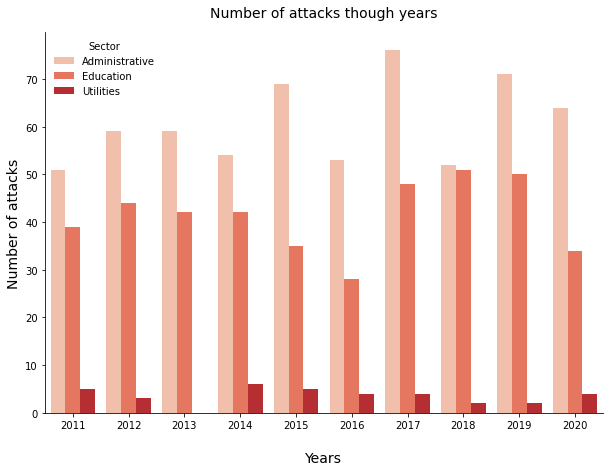

In [41]:
fig, ax = plt.subplots(figsize=(10,7))

sns.barplot(data=dataset15,
            x = "year",
            y = "breaches",
            hue = "sector",
            ci = None,
            palette = "Reds")


ax.set_title('Number of attacks though years',
             fontsize=14,
             pad = 15)

plt.legend(loc = 'upper left',
           title='Sector',
           frameon=False)

ax.set_xlabel('Years',
              fontsize=14)

ax.set_ylabel('Number of attacks',
              fontsize=14)

ax.xaxis.set_label_coords(0.5, -0.10)

sns.despine()

plt.savefig("breaches_most_effective.jpg", format="jpg", bbox_inches="tight", pad_inches=0.5)

plt.show()

*Result 4* --> There is no attack pattern considering the three sectors evaluated. The sectors Administrative and Education are more attacked than the Utilities sector. However the amount of money lost on each breach on the Utilities sector is higher than the ones performed against Administration and Education. This shows that although the sector of Utilities is not one that has a high number of attacks, each attacked on this sector causes a high lost, probably due to weaknesses on its system. Once the invader groups discover this information, this sector might be targeted more times and this can cause more damages. The security in the Utility sector must be reinforced immediately.   